<a href="https://colab.research.google.com/github/MuhammadNurilHuda/DeepFake-Detection/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 24 kB/s 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
rcParams['figure.figsize']=(12,8)

import warnings
warnings.filterwarnings('always')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/diabetes.csv')
# df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Distribution

## Pregnancies

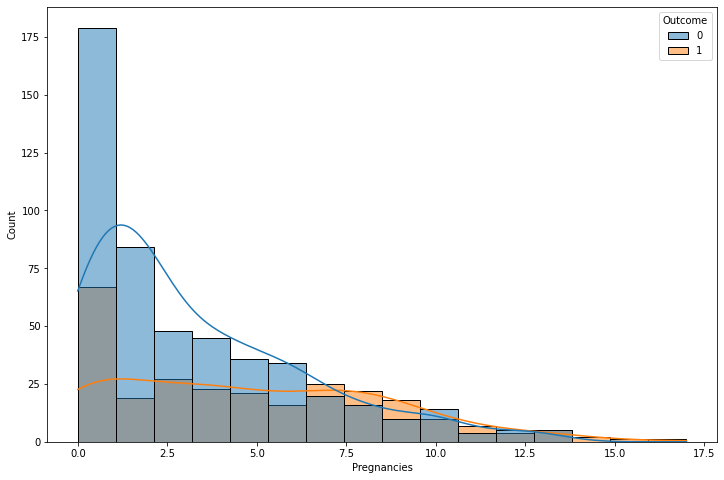

In [ ]:
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True)

## Glucose

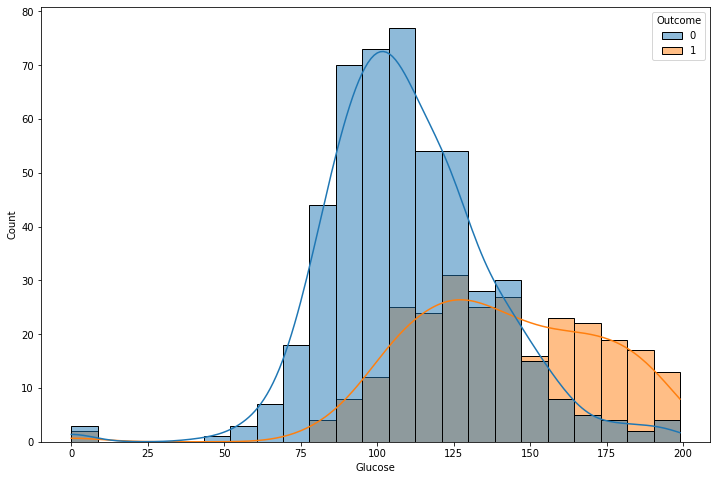

In [ ]:
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)

## Blood Pressure

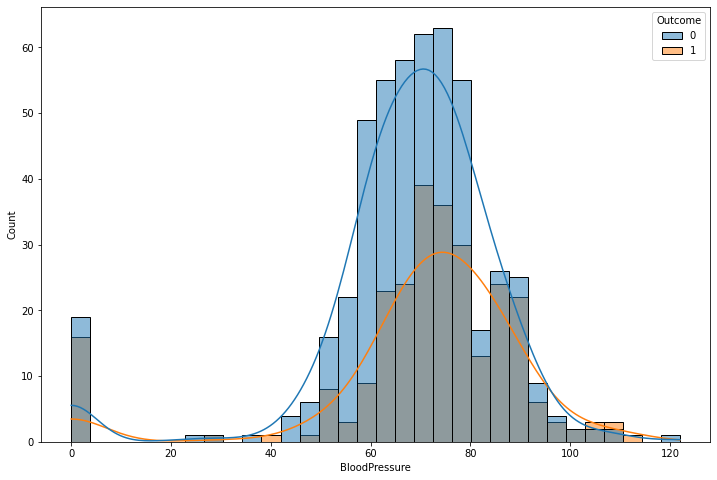

In [ ]:
sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=True)

## Skin Thickness

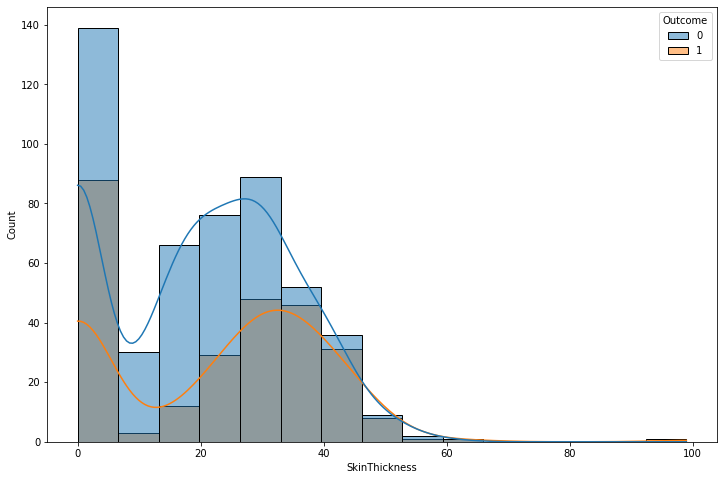

In [ ]:
sns.histplot(data=df, x='SkinThickness', hue='Outcome', kde=True)

## Insulin

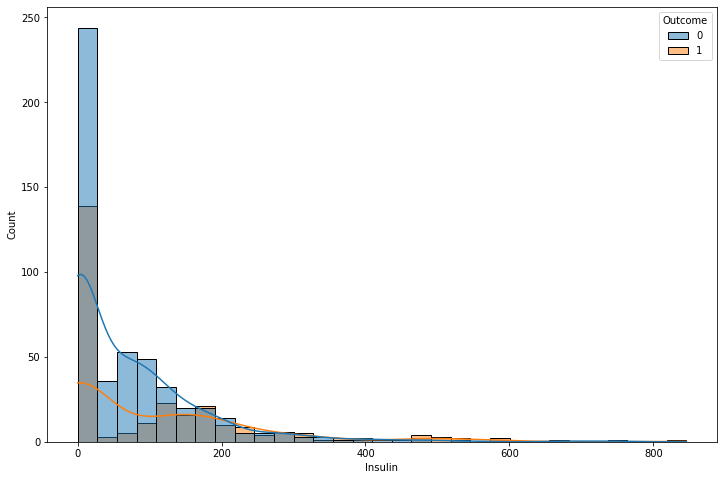

In [ ]:
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True)

## BMI

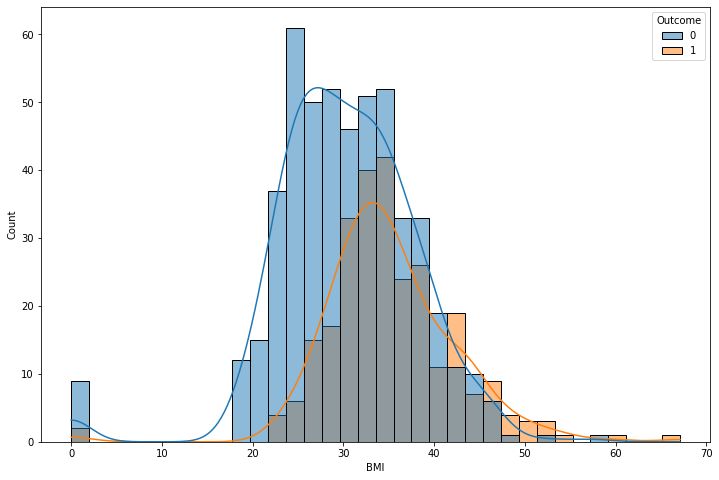

In [ ]:
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)

## Diabetes Pedigree Function

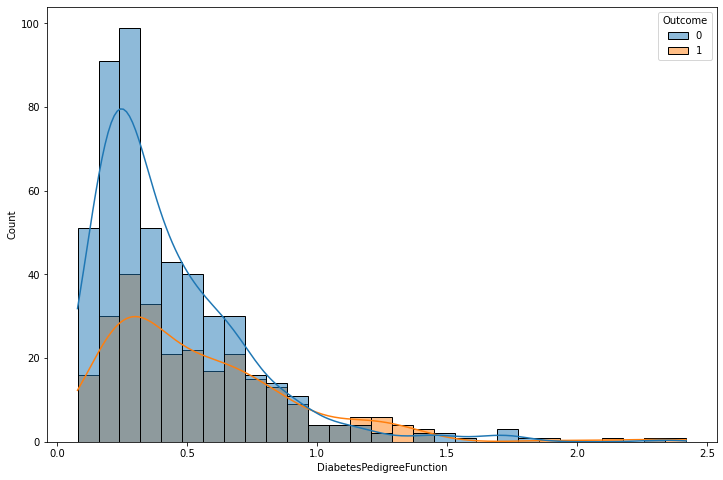

In [ ]:
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True)

## Age

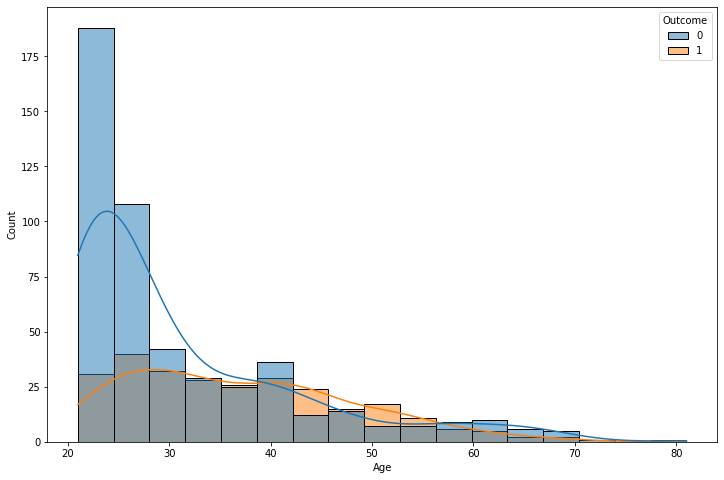

In [ ]:
sns.histplot(data=df, x='Age', hue='Outcome', kde=True)

## Check imbalanced dataset

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df['Outcome'].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

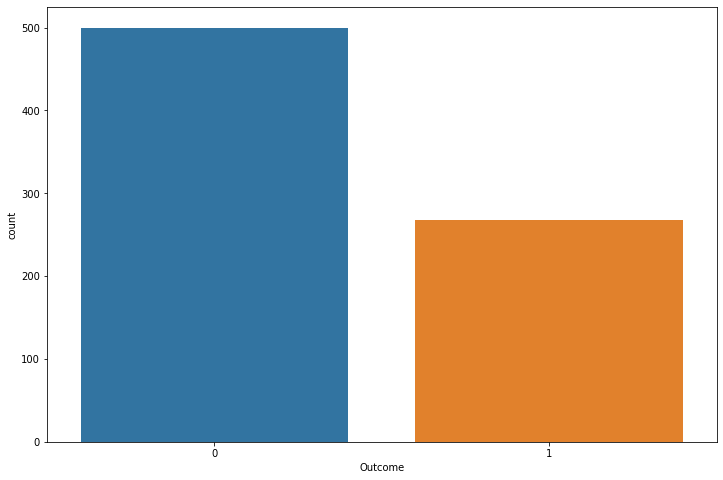

In [ ]:
sns.countplot(x=df['Outcome'])

In [ ]:
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=['0','1'], values=df['Outcome'].value_counts()/df['Outcome'].shape[0], hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Outcome")
fig.show()

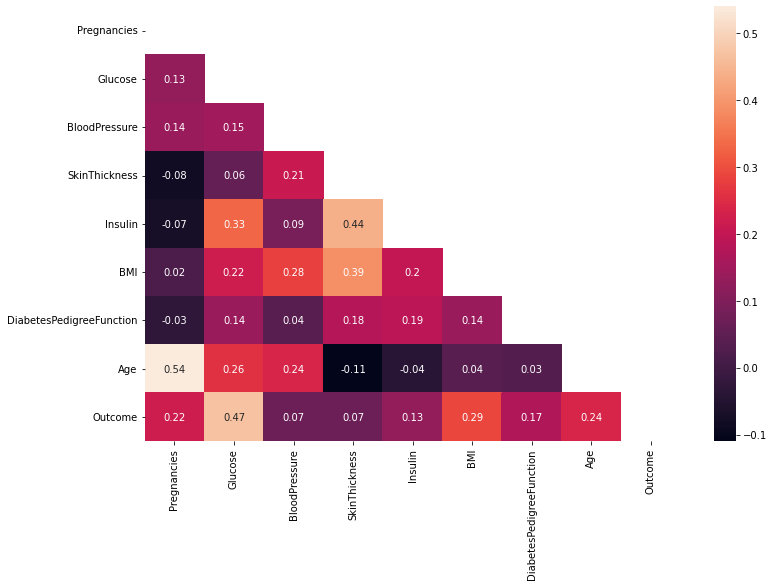

In [ ]:
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,mask=mask,cbar=True)

# Splitting data

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']]
y = df[['Outcome']]
std_cols = ['Glucose', 'BloodPressure', 'Insulin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

X_train_maxabs = X_train.copy()
X_test_maxabs = X_test.copy()

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

X_train_zscore = X_train.copy()
X_test_zscore = X_test.copy()

In [ ]:
X_train_maxabs[std_cols] = MaxAbsScaler().fit_transform(X_train_maxabs[std_cols])
X_test_maxabs[std_cols] = MaxAbsScaler().fit_transform(X_test_maxabs[std_cols])

X_train_minmax[std_cols] = MinMaxScaler().fit_transform(X_train_minmax[std_cols])
X_test_minmax[std_cols] = MinMaxScaler().fit_transform(X_test_minmax[std_cols])

X_train_zscore[std_cols] = StandardScaler().fit_transform(X_train_zscore[std_cols])
X_test_zscore[std_cols] = StandardScaler().fit_transform(X_test_zscore[std_cols])

# Modeling

## 80:20

### AdaBoost

In [ ]:
ab = AdaBoostClassifier(n_estimators=50, base_estimator=None, learning_rate=0.001, algorithm='SAMME.R', random_state=42)

In [ ]:
# Raw
ab.fit(X_train_raw, y_train.values.ravel())
y_pred_raw = ab.predict(X_test_raw)
print("Accuracy : ", accuracy_score(y_test,y_pred_raw))
print("Precision : ", precision_score(y_test,y_pred_raw))
print("Recall : ", recall_score(y_test,y_pred_raw))
print("F1-score : ", f1_score(y_test,y_pred_raw))

Accuracy :  0.7402597402597403
Precision :  0.6271186440677966
Recall :  0.6727272727272727
F1-score :  0.6491228070175439


In [ ]:
# MaxAbs
ab.fit(X_train_maxabs, y_train.values.ravel())
y_pred_maxabs = ab.predict(X_test_maxabs)
print("Accuracy : ", accuracy_score(y_test,y_pred_maxabs))
print("Precision : ", precision_score(y_test,y_pred_maxabs))
print("Recall : ", recall_score(y_test,y_pred_maxabs))
print("F1-score : ", f1_score(y_test,y_pred_maxabs))

Accuracy :  0.7402597402597403
Precision :  0.6271186440677966
Recall :  0.6727272727272727
F1-score :  0.6491228070175439


In [ ]:
# MinMax
ab.fit(X_train_minmax, y_train.values.ravel())
y_pred_minmax = ab.predict(X_test_minmax)
print("Accuracy : ", accuracy_score(y_test,y_pred_minmax))
print("Precision : ", precision_score(y_test,y_pred_minmax))
print("Recall : ", recall_score(y_test,y_pred_minmax))
print("F1-score : ", f1_score(y_test,y_pred_minmax))

Accuracy :  0.7532467532467533
Precision :  0.7428571428571429
Recall :  0.4727272727272727
F1-score :  0.5777777777777778


In [ ]:
# Z-Score
ab.fit(X_train_zscore, y_train.values.ravel())
y_pred_zscore = ab.predict(X_test_zscore)
print("Accuracy : ", accuracy_score(y_test,y_pred_zscore))
print("Precision : ", precision_score(y_test,y_pred_zscore))
print("Recall : ", recall_score(y_test,y_pred_zscore))
print("F1-score : ", f1_score(y_test,y_pred_zscore))

Accuracy :  0.7402597402597403
Precision :  0.6271186440677966
Recall :  0.6727272727272727
F1-score :  0.6491228070175439


### XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=50, booster='gbtree', eta=0.0001, max_depth=50, objective='reg:squarederror', eval_metrics='logloss', random_state=42 ,verbosity=0, use_label_encoder=False)

In [ ]:
# Raw 
xgb.fit(X_train_raw, y_train.values.ravel())
y_pred_raw = xgb.predict(X_test_raw)
print("Accuracy : ", accuracy_score(y_test,y_pred_raw))
print("Precision : ", precision_score(y_test,y_pred_raw))
print("Recall : ", recall_score(y_test,y_pred_raw))
print("F1-score : ", f1_score(y_test,y_pred_raw))

Accuracy :  0.7272727272727273
Precision :  0.6140350877192983
Recall :  0.6363636363636364
F1-score :  0.625


In [ ]:
# MaxABS
xgb.fit(X_train_maxabs, y_train.values.ravel())
y_pred_maxabs = xgb.predict(X_test_maxabs)
print("Accuracy : ", accuracy_score(y_test,y_pred_maxabs))
print("Precision : ", precision_score(y_test,y_pred_maxabs))
print("Recall : ", recall_score(y_test,y_pred_maxabs))
print("F1-score : ", f1_score(y_test,y_pred_maxabs))

Accuracy :  0.7012987012987013
Precision :  0.576271186440678
Recall :  0.6181818181818182
F1-score :  0.5964912280701754


In [ ]:
# MinMax
xgb.fit(X_train_minmax, y_train.values.ravel())
y_pred_minmax = xgb.predict(X_test_minmax)
print("Accuracy : ", accuracy_score(y_test,y_pred_minmax))
print("Precision : ", precision_score(y_test,y_pred_minmax))
print("Recall : ", recall_score(y_test,y_pred_minmax))
print("F1-score : ", f1_score(y_test,y_pred_minmax))

Accuracy :  0.8246753246753247
Precision :  0.8181818181818182
Recall :  0.6545454545454545
F1-score :  0.7272727272727274


In [ ]:
# Z-score
xgb.fit(X_train_zscore, y_train.values.ravel())
y_pred_zscore = xgb.predict(X_test_zscore)
print("Accuracy : ", accuracy_score(y_test,y_pred_zscore))
print("Precision : ", precision_score(y_test,y_pred_zscore))
print("Recall : ", recall_score(y_test,y_pred_zscore))
print("F1-score : ", f1_score(y_test,y_pred_zscore))

Accuracy :  0.7272727272727273
Precision :  0.6181818181818182
Recall :  0.6181818181818182
F1-score :  0.6181818181818182


### CatBoost

In [ ]:
cb = CatBoostClassifier(iterations=50, learning_rate=0.0001, depth=16, random_seed=42, verbose=0)

In [ ]:
# Raw
cb.fit(X_train_raw, y_train)
y_pred_raw = cb.predict(X_test_raw)
print("Accuracy : ", accuracy_score(y_test,y_pred_raw))
print("Precision : ", precision_score(y_test,y_pred_raw))
print("Recall : ", recall_score(y_test,y_pred_raw))
print("F1-score : ", f1_score(y_test,y_pred_raw))

Accuracy :  0.7597402597402597
Precision :  0.6875
Recall :  0.6
F1-score :  0.6407766990291262


In [ ]:
# MaxABS
cb.fit(X_train_maxabs, y_train)
y_pred_maxabs = cb.predict(X_test_maxabs)
print("Accuracy : ", accuracy_score(y_test,y_pred_maxabs))
print("Precision : ", precision_score(y_test,y_pred_maxabs))
print("Recall : ", recall_score(y_test,y_pred_maxabs))
print("F1-score : ", f1_score(y_test,y_pred_maxabs))

Accuracy :  0.7597402597402597
Precision :  0.6956521739130435
Recall :  0.5818181818181818
F1-score :  0.6336633663366337


In [ ]:
# MinMax
cb.fit(X_train_minmax, y_train)
y_pred_minmax = cb.predict(X_test_minmax)
print("Accuracy : ", accuracy_score(y_test,y_pred_minmax))
print("Precision : ", precision_score(y_test,y_pred_minmax))
print("Recall : ", recall_score(y_test,y_pred_minmax))
print("F1-score : ", f1_score(y_test,y_pred_minmax))

Accuracy :  0.7597402597402597
Precision :  0.8214285714285714
Recall :  0.41818181818181815
F1-score :  0.5542168674698795


In [ ]:
# Z-score
cb.fit(X_train_zscore, y_train)
y_pred_zscore = cb.predict(X_test_zscore)
print("Accuracy : ", accuracy_score(y_test,y_pred_zscore))
print("Precision : ", precision_score(y_test,y_pred_zscore))
print("Recall : ", recall_score(y_test,y_pred_zscore))
print("F1-score : ", f1_score(y_test,y_pred_zscore))

Accuracy :  0.7727272727272727
Precision :  0.717391304347826
Recall :  0.6
F1-score :  0.6534653465346534


### Gradient Boost

In [ ]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001, max_depth=50, criterion='friedman_mse', random_state=42)

In [ ]:
# Raw
gb.fit(X_train_raw, y_train.values.ravel())
y_pred_raw = gb.predict(X_test_raw)
print("Accuracy : ", accuracy_score(y_test,y_pred_raw))
print("Precision : ", precision_score(y_test,y_pred_raw, average='weighted', labels=np.unique(y_pred_raw)))
print("Recall : ", recall_score(y_test,y_pred_raw, average='weighted', labels=np.unique(y_pred_raw)))
print("F1-score : ", f1_score(y_test,y_pred_raw, average='weighted', labels=np.unique(y_pred_raw)))

Accuracy :  0.6428571428571429
Precision :  0.6428571428571429
Recall :  1.0
F1-score :  0.782608695652174


In [ ]:
# MaxABS
gb.fit(X_train_maxabs, y_train.values.ravel())
y_pred_maxabs = gb.predict(X_test_maxabs)
print("Accuracy : ", accuracy_score(y_test,y_pred_maxabs))
print("Precision : ", precision_score(y_test,y_pred_maxabs, average='weighted', labels=np.unique(y_pred_maxabs)))
print("Recall : ", recall_score(y_test,y_pred_maxabs, average='weighted', labels=np.unique(y_pred_maxabs)))
print("F1-score : ", f1_score(y_test,y_pred_maxabs, average='weighted', labels=np.unique(y_pred_maxabs)))

Accuracy :  0.6428571428571429
Precision :  0.6428571428571429
Recall :  1.0
F1-score :  0.782608695652174


In [ ]:
# MinMax
gb.fit(X_train_minmax, y_train.values.ravel())
y_pred_minmax = gb.predict(X_test_minmax)
print("Accuracy : ", accuracy_score(y_test,y_pred_minmax))
print("Precision : ", precision_score(y_test,y_pred_minmax, average='weighted', labels=np.unique(y_pred_minmax)))
print("Recall : ", recall_score(y_test,y_pred_minmax, average='weighted', labels=np.unique(y_pred_minmax)))
print("F1-score : ", f1_score(y_test,y_pred_minmax, average='weighted', labels=np.unique(y_pred_minmax)))

Accuracy :  0.6428571428571429
Precision :  0.6428571428571429
Recall :  1.0
F1-score :  0.782608695652174


In [ ]:
# Z-score
gb.fit(X_train_zscore, y_train.values.ravel())
y_pred_zscore = gb.predict(X_test_zscore)
print("Accuracy : ", accuracy_score(y_test,y_pred_zscore))
print("Precision : ", precision_score(y_test,y_pred_zscore, average='weighted', labels=np.unique(y_pred_zscore)))
print("Recall : ", recall_score(y_test,y_pred_zscore, average='weighted', labels=np.unique(y_pred_zscore)))
print("F1-score : ", f1_score(y_test,y_pred_zscore, average='weighted', labels=np.unique(y_pred_zscore)))

Accuracy :  0.6428571428571429
Precision :  0.6428571428571429
Recall :  1.0
F1-score :  0.782608695652174


### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_features='auto', max_depth=50, random_state=42)

In [ ]:
# Raw
rf.fit(X_train_raw, y_train.values.ravel())
y_pred_raw = rf.predict(X_test_raw)
print("Accuracy : ", accuracy_score(y_test,y_pred_raw))
print("Precision : ", precision_score(y_test,y_pred_raw))
print("Recall : ", recall_score(y_test,y_pred_raw))
print("F1-score : ", f1_score(y_test,y_pred_raw))

Accuracy :  0.7337662337662337
Precision :  0.625
Recall :  0.6363636363636364
F1-score :  0.6306306306306306


In [ ]:
# MaxABS
rf.fit(X_train_maxabs, y_train.values.ravel())
y_pred_maxabs = rf.predict(X_test_maxabs)
print("Accuracy : ", accuracy_score(y_test,y_pred_maxabs))
print("Precision : ", precision_score(y_test,y_pred_maxabs))
print("Recall : ", recall_score(y_test,y_pred_maxabs))
print("F1-score : ", f1_score(y_test,y_pred_maxabs))

Accuracy :  0.7532467532467533
Precision :  0.660377358490566
Recall :  0.6363636363636364
F1-score :  0.6481481481481481


In [ ]:
# MinMax
rf.fit(X_train_minmax, y_train.values.ravel())
y_pred_minmax = rf.predict(X_test_minmax)
print("Accuracy : ", accuracy_score(y_test,y_pred_minmax))
print("Precision : ", precision_score(y_test,y_pred_minmax))
print("Recall : ", recall_score(y_test,y_pred_minmax))
print("F1-score : ", f1_score(y_test,y_pred_minmax))

Accuracy :  0.7597402597402597
Precision :  0.75
Recall :  0.4909090909090909
F1-score :  0.5934065934065934


In [ ]:
# Z-score
rf.fit(X_train_zscore, y_train.values.ravel())
y_pred_zscore = rf.predict(X_test_zscore)
print("Accuracy : ", accuracy_score(y_test,y_pred_zscore))
print("Precision : ", precision_score(y_test,y_pred_zscore))
print("Recall : ", recall_score(y_test,y_pred_zscore))
print("F1-score : ", f1_score(y_test,y_pred_zscore))

Accuracy :  0.7207792207792207
Precision :  0.6071428571428571
Recall :  0.6181818181818182
F1-score :  0.6126126126126126


### Hyper Tuning

In [ ]:
scores=[]
best_estimators = {}

model_params = {
    
    'AdaBoost' : {
        'model' : AdaBoostClassifier(),
        'params' : {
            'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
            'base_estimator' : [None],
            'learning_rate' : [0.0001,0.001,0.01,0.1,0.3,1],
            'algorithm' : ['SAMME', 'SAMME.R'],
            'random_state' : [1,42,1000,2022]
        }
    },

    'XGBoost' : {
        'model' : XGBClassifier(),
        'params' : {
            'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
            'booster' : ['gbtree', 'gblinear', 'dart'],
            'eta' : [0.0001,0.001,0.01,0.1,0.3,1],
            'max_depth' : [5,6,8,9,10,20,50,60,80,100],
            'objective' : ['reg:squarederror', 'binary:logistic', 'binary:logitraw', 'binary:hinge'],
            'eval_metrics' : ['rmse', 'logloss'],
            'use_label_encoder' : [False],
            'random_state' : [1,42,1000,2022]
        }
    },

    'CatBoost' : {
        'model' : CatBoostClassifier(),
        'params' : {
            'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
            'learning_rate' : [0.0001,0.001,0.01,0.1,0.3,1],
            'eval_metrics' : ['rmse', 'logloss'],
            'random_seed' : [1,42,1000,2022]
        }
    },

    'GradientBoost' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
            'learning_rate' : [0.0001,0.001,0.01,0.1,0.3,1],
            'max_depth' : [5,6,8,9,10,20,50,60,80,100],
            'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
            'random_state' : [1,42,1000,2022]
        }
    },

    'RandomForest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'max_depth' : [5,6,8,9,10,20,50,60,80,100],
            'random_state' : [1,42,1000,2022]
        }
    }

}

In [ ]:
import time


for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    start_time = time.time()
    
    clf.fit(X_train_raw, y_train.values.ravel())    
    

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': str(clf.best_params_)
    })
    best_estimators[model_name] = clf.best_estimator_
    print('{} minutes'.format((time.time() - start_time)/60))

AdaBoostClassifier() {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'base_estimator': [None], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.3, 1], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [1, 42, 1000, 2022]}
7.110123447577158 minutes
XGBClassifier() {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'booster': ['gbtree', 'gblinear', 'dart'], 'eta': [0.0001, 0.001, 0.01, 0.1, 0.3, 1], 'max_depth': [5, 6, 8, 9, 10, 20, 50, 60, 80, 100], 'objective': ['reg:squarederror', 'binary:logistic', 'binary:logitraw', 'binary:hinge'], 'eval_metrics': ['rmse', 'logloss'], 'use_label_encoder': [False], 'random_state': [1, 42, 1000, 2022]}


KeyboardInterrupt: ignored